# Machin learning(ML) y Dinámica Estructural

```
Autor       : Francisco Jimenez Mucho
Linkedin    : https://www.linkedin.com/in/fjmucho/
date:       : 7 Julio 2025
based on    : https://github.com/Mario5587/Curso-Fes-Arag-n.-UNAM/blob/main/Red_Neuronal.ipynb
```

## 1. Red neuronal para resolver la ecuacion dinamica de un grado de libertad.

### 1.1 Sistema Dinámico de Un Grado de Libertad (SDOF)

La ecuación diferencial que describe un sistema dinámico de un grado de libertad (SDOF) es:

$$m \ddot{y}(t) + c \dot{y}(t) + k y(t) = P(t)$$

donde:

- $m$: masa del sistema.  
- $c$: coeficiente de amortiguamiento.  
- $k$: rigidez del sistema.  
- $P(t)$: fuerza externa aplicada al sistema (si existe).  
- $y(t)$: desplazamiento del sistema en función del tiempo.  

#### A) Vibración Libre Sin Amortiguamiento ($c = 0, P(t) = 0$):

$m \ddot{y}(t) + k y(t) = 0.$

La solución general es:

$y(t) = y_0 \cos(\omega_n t) + \frac{\dot{y}_0}{\omega_n} \sin(\omega_n t)$,

donde:

$\omega_n = \sqrt{\frac{k}{m}}$ es la frecuencia natural.

#### B) Vibración Libre Con Amortiguamiento ($P(t) = 0$):

$m \ddot{y}(t) + c \dot{y}(t) + k y(t) = 0.$

La solución depende del factor de amortiguamiento crítico:

$\zeta = \frac{c}{2 \sqrt{k m}}.$

**a. Subamortiguado ($\zeta < 1$):**

$y(t) = e^{-\zeta \omega_n t} \left( y_0 \cos(\omega_d t) + \frac{\dot{y}_0 + \zeta \omega_n y_0}{\omega_d} \sin(\omega_d t) \right),$

donde:

$\omega_d = \omega_n \sqrt{1 - \zeta^2}.$

**b. Críticamente amortiguado ($\zeta = 1$) y Sobreamortiguado ($\zeta > 1$):**

Las soluciones en estos casos son más complejas y no se incluyen aquí.

#### C) Con Fuerza Externa ($P(t) \neq 0$):

La solución incluye la combinación de:

1. **Solución homogénea**: Como en los casos anteriores.  
2. **Solución particular**: Depende de $P(t)$.

In [1]:
# !pip install numpy pandas tensorflow sklearn seaborn matplotlib -q

### Ejemplo-01 Práctico

En este modelo, usaremos el caso **subamortiguado** ($\zeta < 1$) con $P(t) = 0$.

#### <img alt="pagakes" src="https://pypi.org/static/images/white-cube.2351a86c.svg" width="1.%"/> Importacion de Librerias, clases, funciones, constantes, etc.

In [2]:
import math
import numpy as np
import pandas as pd

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#  Configuracion de graficos
plt.style.use('default') # seaborn-v0.8
# plt.set_palette('deep')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

#### 1. Carga y preparacion de datos (data)

In [6]:
# Sistema de unidades


In [7]:
def generate_data(num_samples):
    data, labels = [], []
    for _ in range(num_samples):
        mass = np.random.uniform(1, 10)    # Masa
        k = np.random.uniform(10, 100)  # Rigidez
        c = np.random.uniform(0, 10)    # Amortiguamiento
        y0 = np.random.uniform(-5, 5)   # Desplazamiento inicial
        v0 = np.random.uniform(-5, 5)   # Velocidad inicial
        t = np.linspace(0, 10, 100)     # Tiempo

        omega_n = np.sqrt(k / mass)
        zeta = c / (2 * np.sqrt(k * mass))
        omega_d = omega_n * np.sqrt(1 - zeta**2) if zeta < 1 else 0

        #  ampliar las funcionalidades o algoritmos de Vibrcion Libre para 1GDL aqui...
        if zeta < 1:
            y = np.exp(-zeta * omega_n * t) * (
                y0 * np.cos(omega_d * t) +
                (v0 + zeta * omega_n * y0) / omega_d * np.sin(omega_d * t)
            )
        else:
            y = np.zeros_like(t)

        data.append([mass, c, k, y0, v0])
        labels.append(y)

    return np.array(data), np.array(labels)

#### 2. Pre-Calculos de la data 

In [8]:
num_samples = 10000
data, labels = generate_data(num_samples)

# 80% para entrenar y 20% para validar
train_data = data[:8000]
train_labels = labels[:8000]
val_data = data[8000:]
val_labels = labels[8000:]

data_temp = pd.DataFrame(data, columns=['masa (m)','amortiguamiento (c)','rigidez (k)','desplazamiento inicial','velocidad inicial'])
data_temp.head()

,masa (m),amortiguamiento (c),rigidez (k),desplazamiento inicial,velocidad inicial
0,2.019479,1.318215,33.497958,2.510931,2.232235
1,9.205005,8.184244,65.969834,3.763893,-0.103787
2,1.386788,7.821602,57.767528,1.128837,-3.291962
3,9.774582,1.679506,65.074901,-3.083151,2.347175
4,8.977980,4.970852,62.511561,-3.848595,-2.398803


In [9]:
display(data_temp.info())

# print(f"variables: {data.columns.tolist()}\n")

# print(f"tipos de datos:\n{data.dtypes}\n")

# print(f"Valores nulos por columna:\n{data.isnull().sum()}\n")

# data_keys = data_temp.keys()
data_keys = data_temp.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   masa (m)                10000 non-null  float64
 1   amortiguamiento (c)     10000 non-null  float64
 2   rigidez (k)             10000 non-null  float64
 3   desplazamiento inicial  10000 non-null  float64
 4   velocidad inicial       10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


None

In [10]:
data_temp.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
masa (m),10000.0,5.48,2.61,1.0,3.21,5.46,7.75,10.00
amortiguamiento (c),10000.0,5.01,2.90,0.0,2.50,4.99,7.56,10.00
rigidez (k),10000.0,55.03,25.89,10.0,32.92,55.29,77.46,99.99
desplazamiento inicial,10000.0,-0.03,2.88,-5.0,-2.52,-0.04,2.48,5.00
velocidad inicial,10000.0,0.03,2.89,-5.0,-2.48,0.09,2.52,5.00


In [11]:
def plot_distribution_data(data):
    rows = 1 if (data.shape[1])<=4 else math.ceil((data.shape[1])/4)
    print(rows)
    fig, axes = plt.subplots(
        nrows = rows, 
        ncols = 4, # numero de variables X (independientes) y Y (dependiente)
        figsize=(16, 5*rows)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, column in enumerate(data.columns):
        # axes[i].hist(data[column], bins=30, edgecolor='tab:blue', color="skyblue", alpha=0.7)
        sns.histplot(data[column], kde=True, stat="count", bins=30, color='skyblue', edgecolor='blue', ax=axes[i])
        # sns.kdeplot(data[column], color='red', ax=axes[i])
        axes[i].set_title(f'Distribución de {column}', fontsize=10, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frecuencia')
        # Agregamos estadisticas basicas
        mean_value = data[column].mean()
        median_value = data[column].median()
        axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
        axes[i].axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
        axes[i].legend(fontsize=8)
        # axes[i].grid(True)
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(
        figsize=(16, 7)
        )
    
    # Calculamos la matriz de correlación - 'pearson', 'spearman', 'kendall'
    corr = data.corr()
    # Crear una máscara para la parte superior de la matriz
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Crear heatmap
    sns.heatmap(
        corr, 
        mask=mask, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        vmax=1, 
        vmin=-1,
        square=True, 
        cbar_kws={"shrink": .8}
        )
    
    plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('03_correlacion.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_boxplot_data(data):
    rows = 1 if (data.shape[1])<=4 else math.ceil((data.shape[1])/4)
    fig, axes = plt.subplots(
        nrows=rows, 
        ncols=4, 
        figsize=(16, 6)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, column in enumerate(data.columns):
        box_data = axes[i].boxplot(data[column], vert=True, patch_artist=True, 
                                       boxprops=dict(facecolor='lightblue', color='tab:blue'),
                                       medianprops=dict(color='red'),
                                       whiskerprops=dict(color='tab:blue'),
                                       capprops=dict(color='tab:blue'),
                                       flierprops=dict(markerfacecolor='red', marker='o'))
        # sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Boxplot de {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].grid(True, alpha=0.7)

        # Calcular y mostrar informacion de outliers
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q1 + 1.5 * IQR
        outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
        if not outliers.empty or len(outliers) > 0:
            axes[i].text(0.05, 0.95, f'Outliers: {len(outliers)}', transform=axes[i].transAxes,
                         fontsize=12, verticalalignment='top', bbox=dict(facecolor='green', alpha=0.5))

    plt.tight_layout()
    plt.show()


2


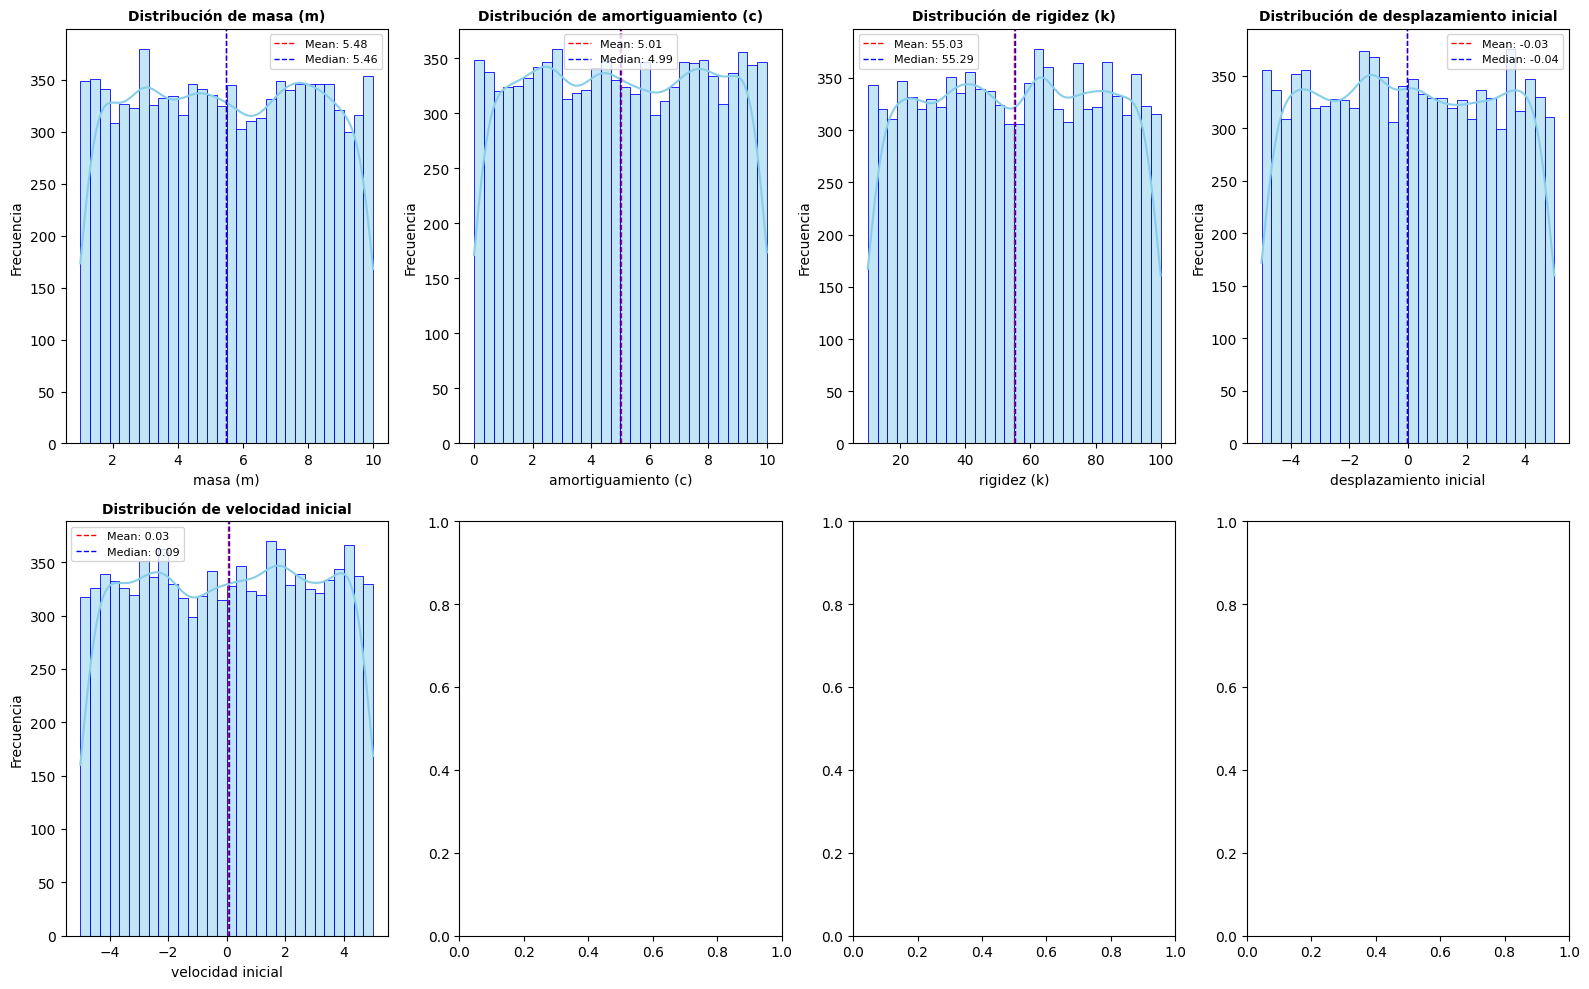

In [12]:
plot_distribution_data(data_temp)

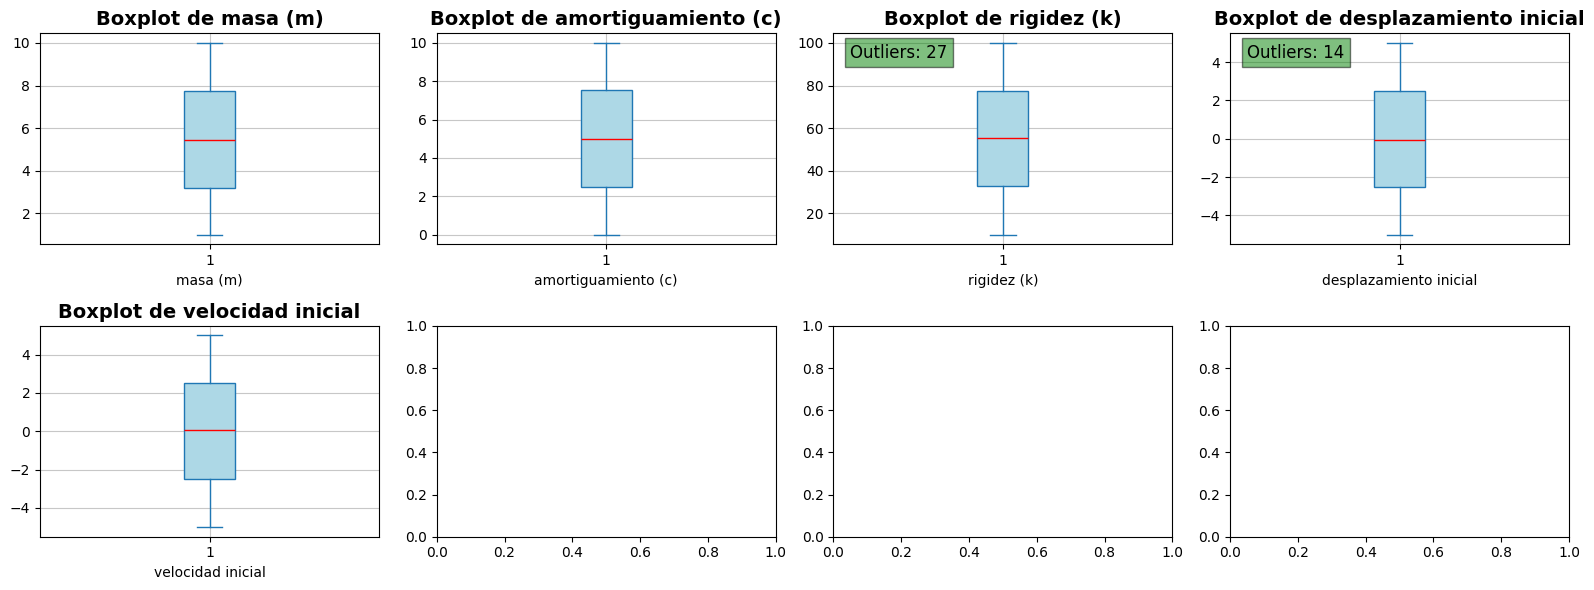

In [13]:
plot_boxplot_data(data_temp)

In [ ]:
# plot_correlation_matrix(data_temp)

#### 3. Entrenamento-1

In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(128, activation='relu'),
    Dense(100)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.fit(
    train_data, train_labels, 
    epochs=50, batch_size=32, 
    validation_data=(val_data, val_labels)
    )

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3229 - mae: 0.9958 - val_loss: 0.5939 - val_mae: 0.4619
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5215 - mae: 0.4274 - val_loss: 0.5006 - val_mae: 0.4153
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4660 - mae: 0.3952 - val_loss: 0.4399 - val_mae: 0.3820
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4103 - mae: 0.3671 - val_loss: 0.3968 - val_mae: 0.3550
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3864 - mae: 0.3495 - val_loss: 0.3806 - val_mae: 0.3482
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3494 - mae: 0.3308 - val_loss: 0.3551 - val_mae: 0.3318
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3310 - mae: 0.3202 - val_loss: 0.3397 - val_mae: 0.3220
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3173 - mae: 0.3150 - val_loss: 0.3363 - val_mae: 0.3342
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [16]:
test_data, test_labels = generate_data(1000)
loss, mae = model.evaluate(test_data, test_labels)
print(f"Mean Absolute Error: {mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1371 - mae: 0.1930
Mean Absolute Error: 0.1891668140888214


In [17]:
sample_data, sample_label = test_data[0], test_labels[0]
predicted_label = model.predict(sample_data.reshape(1, -1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


#### 3a. Visualizacion del modelo

In [18]:
tiempo = np.linspace(0, 10, 100)

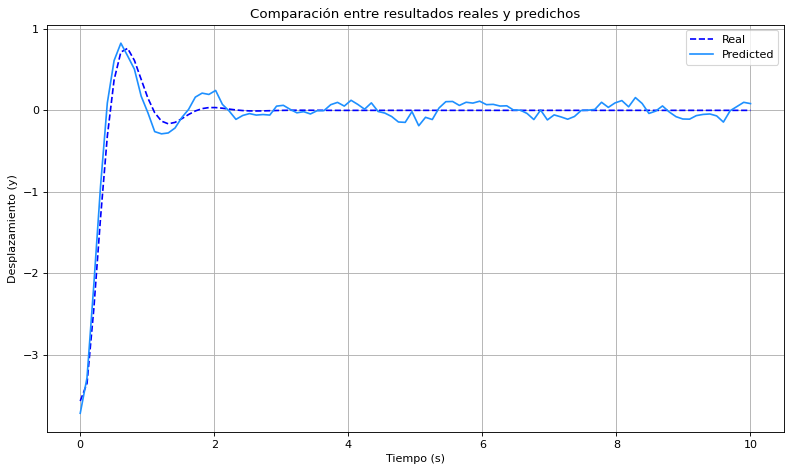

In [30]:
plt.figure(dpi=80, figsize=(10, 6))

plt.plot(tiempo, sample_label, label='Real', linestyle='--', color='blue') # deepskyblue
plt.plot(tiempo, predicted_label, label='Predicted', color='dodgerblue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (y)')
plt.title('Comparación entre resultados reales y predichos')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [32]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=tiempo, 
    y=sample_label, 
    mode='markers', 
    name='Real',
    marker=dict(color='blue', size=5)
))
fig.add_trace(go.Scatter(
    x=tiempo, 
    y=predicted_label, 
    mode='lines', 
    name='Predited',
    line=dict(color='dodgerblue', width=2)
))
fig.update_layout(
    title='Predicciones vs Valores Reales',
    xaxis_title='tiempo (s)',
    yaxis_title='Desplazamiento (y)',
    width=800,
    height=600
)
fig.show()

#### 3. Entrenamento-2

In [37]:
model.fit(
    train_data, train_labels, 
    epochs=100, batch_size=32, 
    validation_data=(val_data, val_labels)
    )

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.4817 - mae: 1.1729 - val_loss: 0.6229 - val_mae: 0.4620
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5949 - mae: 0.4612 - val_loss: 0.5833 - val_mae: 0.4705
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5364 - mae: 0.4374 - val_loss: 0.5023 - val_mae: 0.4089
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5402 - mae: 0.4352 - val_loss: 0.4845 - val_mae: 0.4006
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5212 - mae: 0.4332 - val_loss: 0.4751 - val_mae: 0.3971
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5008 - mae: 0.4167 - val_loss: 0.4854 - val_mae: 0.4150
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4656 - mae: 0.4058 - val_loss: 0.4849 - val_mae: 0.4266
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4517 - mae: 0.3937 - val_loss: 0.4449 - val_mae: 0.3866
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [38]:
model.fit(
    data, labels, epochs=50, 
    batch_size=32, validation_split=0.2
    )

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2337 - mae: 0.2434 - val_loss: 0.2456 - val_mae: 0.2442
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2315 - mae: 0.2380 - val_loss: 0.2514 - val_mae: 0.2549
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2346 - mae: 0.2446 - val_loss: 0.2470 - val_mae: 0.2511
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2331 - mae: 0.2350 - val_loss: 0.2466 - val_mae: 0.2444
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2159 - mae: 0.2302 - val_loss: 0.2384 - val_mae: 0.2313
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2288 - mae: 0.2338 - val_loss: 0.2438 - val_mae: 0.2413
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2363 - mae: 0.2367 - val_loss: 0.2440 - val_mae: 0.2457
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2270 - mae: 0.2325 - val_loss: 0.2434 - val_mae: 0.2425
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

In [39]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(100)
])


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(scaled_data, labels, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.8431 - mae: 0.5015 - val_loss: 0.5785 - val_mae: 0.4022
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5398 - mae: 0.3841 - val_loss: 0.5097 - val_mae: 0.3709
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4822 - mae: 0.3539 - val_loss: 0.4749 - val_mae: 0.3487
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4471 - mae: 0.3361 - val_loss: 0.4634 - val_mae: 0.3426
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4167 - mae: 0.3184 - val_loss: 0.4353 - val_mae: 0.3258
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3987 - mae: 0.3108 - val_loss: 0.4205 - val_mae: 0.3136
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3900 - mae: 0.2987 - val_loss: 0.4133 - val_mae: 0.3122
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3847 - mae: 0.2933 - val_loss: 0.4033 - val_mae: 0.3021
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [41]:
test_data, test_labels = generate_data(1000)
scaled_test_data = scaler.transform(test_data)
loss, mae = model.evaluate(scaled_test_data, test_labels)
print(f"Mean Absolute Error (MAE) en los datos de prueba: {mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2824 - mae: 0.2134
Mean Absolute Error (MAE) en los datos de prueba: 0.211624413728714


In [42]:
loss, mae = model.evaluate(test_data, test_labels)
print(f"Mean Absolute Error (Mejorado): {mae}")

sample_data, sample_label = test_data[0], test_labels[0]
predicted_label = model.predict(sample_data.reshape(1, -1)).flatten()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1488 - mae: 2.5215
Mean Absolute Error (Mejorado): 2.5181870460510254
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


#### 3b. Visualizacion del modelo

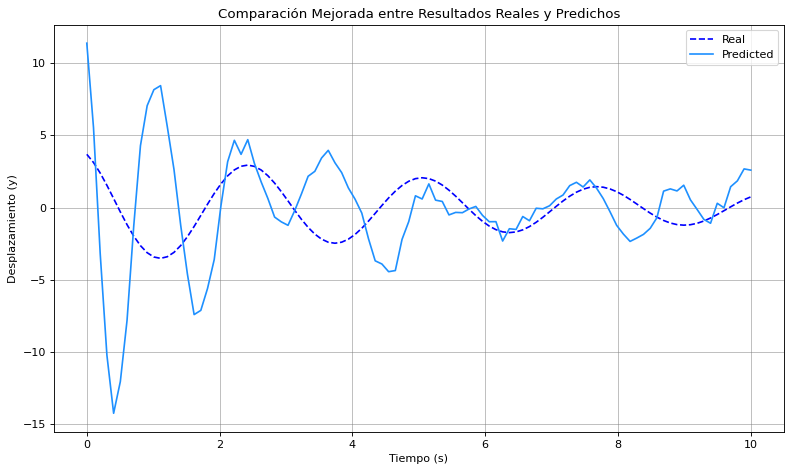

In [43]:
plt.figure(dpi=80, figsize=(10, 6))

plt.plot(np.linspace(0, 10, 100), sample_label, label='Real', linestyle='--', color='blue')
plt.plot(np.linspace(0, 10, 100), predicted_label, label='Predicted', color='dodgerblue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (y)')
plt.title('Comparación Mejorada entre Resultados Reales y Predichos')
plt.legend()
plt.grid(which='both', alpha=0.55, color='gray')

plt.tight_layout()
plt.show()

#### 3. Entrenamento-3

In [44]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(5,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(scaled_data, labels, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6754 - mae: 0.4734 - val_loss: 0.4216 - val_mae: 0.3607
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3810 - mae: 0.3351 - val_loss: 0.3497 - val_mae: 0.3169
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3128 - mae: 0.2958 - val_loss: 0.3070 - val_mae: 0.2955
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2618 - mae: 0.2665 - val_loss: 0.2728 - val_mae: 0.2735
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2469 - mae: 0.2539 - val_loss: 0.2354 - val_mae: 0.2426
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1942 - mae: 0.2226 - val_loss: 0.2184 - val_mae: 0.2390
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1783 - mae: 0.2116 - val_loss: 0.1949 - val_mae: 0.2174
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1707 - mae: 0.2013 - val_loss: 0.1766 - val_mae: 0.2061
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

In [45]:
num_samples = 50000
data, labels = generate_data(num_samples)
scaled_data = scaler.fit_transform(data)
model.fit(scaled_data, labels, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0460 - mae: 0.1027 - val_loss: 0.0415 - val_mae: 0.1019
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0407 - mae: 0.0944 - val_loss: 0.0327 - val_mae: 0.0875
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0367 - mae: 0.0885 - val_loss: 0.0439 - val_mae: 0.1012
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0325 - mae: 0.0862 - val_loss: 0.0302 - val_mae: 0.0818
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0328 - mae: 0.0862 - val_loss: 0.0355 - val_mae: 0.0925
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0357 - mae: 0.0877 - val_loss: 0.0340 - val_mae: 0.0926
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0314 - mae: 0.0853 - val_loss: 0.0391 - val_mae: 0.1026
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0346 - mae: 0.0897 - val_loss: 0.0281 - val_mae: 0.0776
Epoch 9/100
1250/1250 ━━━━━━━━━

In [46]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(128, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(100)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(scaled_data, labels, epochs=100, batch_size=32, validation_split=0.2)

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 1.1957 - mae: 0.4661 - val_loss: 0.6480 - val_mae: 0.4155
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.6330 - mae: 0.4134 - val_loss: 0.6341 - val_mae: 0.4166
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.6127 - mae: 0.4096 - val_loss: 0.6207 - val_mae: 0.4108
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6134 - mae: 0.4118 - val_loss: 0.6108 - val_mae: 0.4067
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.6099 - mae: 0.4111 - val_loss: 0.6053 - val_mae: 0.4052
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5906 - mae: 0.4037 - val_loss: 0.6021 - val_mae: 0.4060
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.5797 - mae: 0.3996 - val_loss: 0.5996 - val_mae: 0.4085
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5899 - mae: 0.4055 - val_loss: 0.5953 - val_mae: 0.4039
Epoch 9/100
1250/1250 ━━━━━━━━━

In [47]:
sample_data, sample_label = test_data[0], test_labels[0]
scaled_sample_data = scaler.transform(sample_data.reshape(1, -1))
predicted_label = model.predict(scaled_sample_data).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


#### 3c. Visualización o renderisado

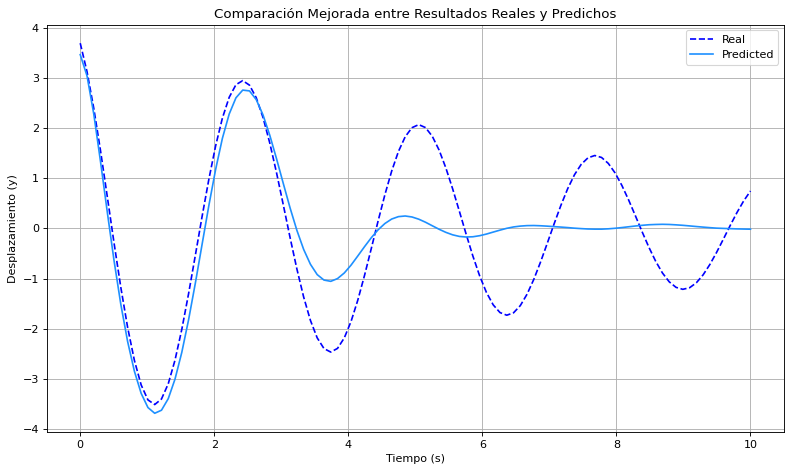

In [48]:
t = np.linspace(0, 10, 100)

plt.figure(dpi=80, figsize=(10, 6))

plt.plot(t, sample_label, label='Real', linestyle='--', color='blue')
plt.plot(t, predicted_label, label='Predicted', color='dodgerblue')
plt.title( 'Comparación Mejorada entre Resultados Reales y Predichos' )
plt.ylabel( 'Desplazamiento (y)' )
plt.xlabel( 'Tiempo (s)' )
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [63]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=t, 
    y=sample_label, 
    mode='lines', 
    line={'dash': 'dash', 'color': 'blue'},
    name='Real',
    marker=dict(color='blue', size=5)
))
fig.add_trace(go.Scatter(
    x=t, 
    y=predicted_label, 
    mode='lines', 
    name='Predited',
    line=dict(color='dodgerblue', width=2)
))
fig.update_layout(
    title='Predicciones vs Valores Reales',
    xaxis_title='tiempo (s)',
    yaxis_title='Desplazamiento (y)',
    width=800,
    height=600
)
fig.show()

#### 4. 🤔 Save data model entraned

#### 5. Validacion y consulta al modelo entrenado

## Referencias.

1. Chapra, S. C., & Canale, R. P. (2010). Numerical Methods for Engineers (6th ed.). MCGraw-Hill Education.
2. 